In [ ]:
%matplotlib inline

import sys
sys.path.insert(0, "../utils/")

from plot_utils import plot_decision_regions

# Aprendizaje supervisado

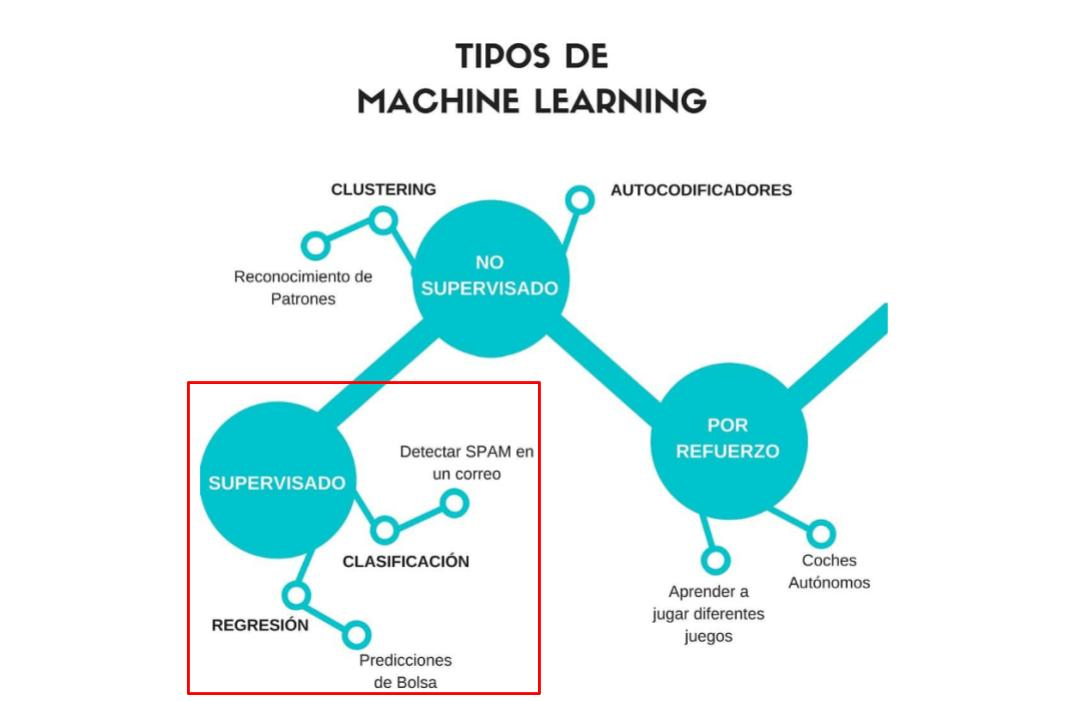

#### Aprendizaje supervisado:
Es un aspecto del Machine Learning que consiste en inferir una función a partir de un conjunto de datos etiquetados

- Estos datos están formados por un vector de valores (variables) y un atributo de clase
- La función inferida debe ser capaz de predecir la clase a partir de los valores observados
- Debe ser capaz de generalizar con instancias no vistas

Es similar al proceso de aprendizaje humano: nosotros aprendemos de experiencias previas y un modelo de clasificación de datos previamente etiquetados

Existen dos tipos de aprendizaje supervisado:

1. **Regresión**: tiene como resultado un número específico. Si las etiquetas suelen ser un valor numérico, mediante las variables de las características, se pueden obtener dígitos como dato resultante.
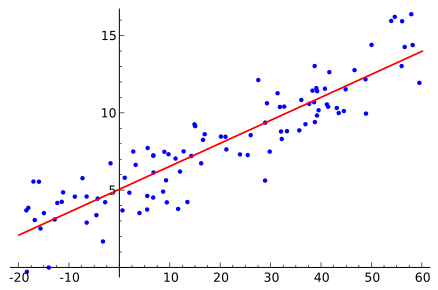

2. **Clasificación**: en este tipo, el algoritmo encuentra diferentes patrones y tiene por objetivo clasificar los elementos en diferentes grupos.
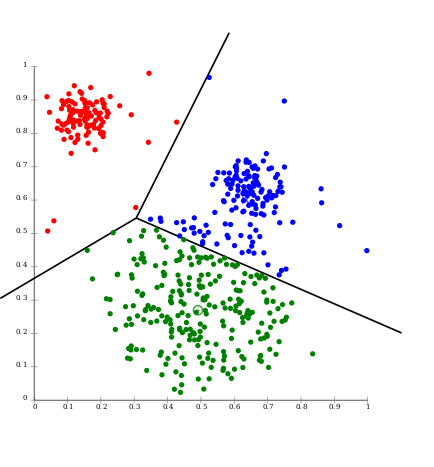
[Ref](https://medium.com/@juanzambrano/aprendizaje-supervisado-o-no-supervisado-39ccf1fd6e7b)

## Regresión lineal
- La regresión lineal ajusta una línea (o plano o hiperplano) al conjunto de datos. 
- En estadística, regresión lineal es una aproximación para modelar la relación entre una variable escalar dependiente `y` y una o mas variables explicativas nombradas con `X`.
- Es potente, simple y rápida, pero puede ser demasiado simple para algunos problemas.

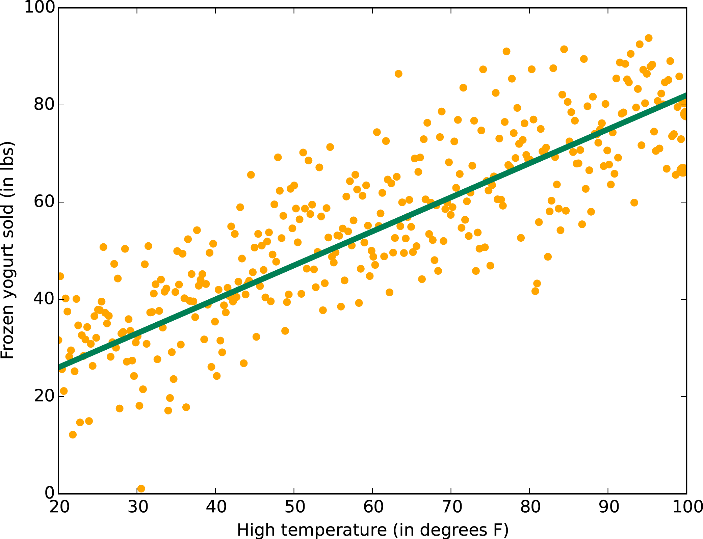
[Ref](https://docs.microsoft.com/es-es/azure/machine-learning/studio/algorithm-choice)

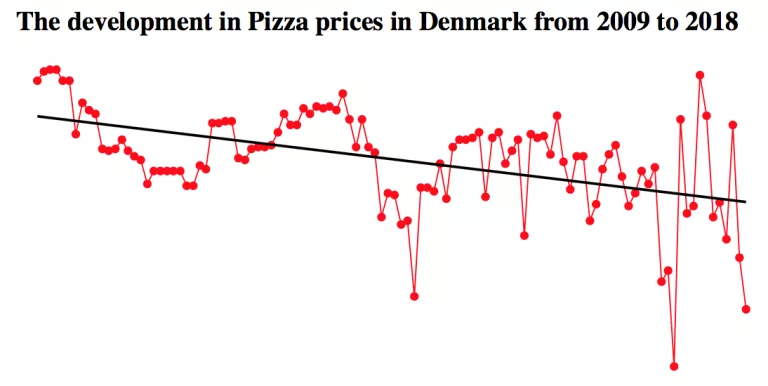
[ref](http://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/)

- El algoritmo deberá minimizar el coste de una función de error cuadrático y esos coeficientes corresponderán con la recta óptima. 
- Hay diversos métodos para conseguir minimizar el coste. Lo más común es utilizar una versión vectorial y la llamada Ecuación Normal que nos dará un resultado directo.

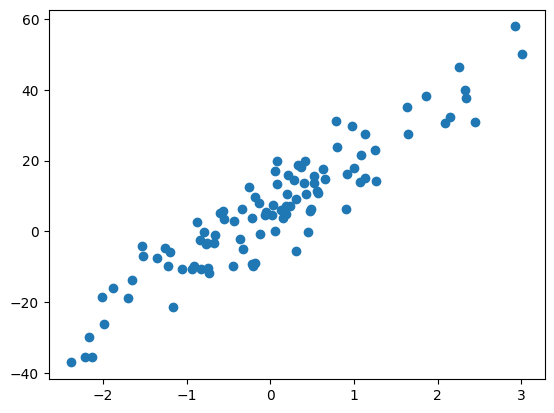

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=7, bias=5)

# plot regression dataset
plt.scatter(X,y)
plt.show()

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print(f'COEF: {regr.coef_}')

# The mean square error
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship between X and y.
print(f'variance score: {regr.score(X_test, y_test)}')

COEF: [14.26794602]
MSE: 60.116664379396106
variance score: 0.7574260267238099


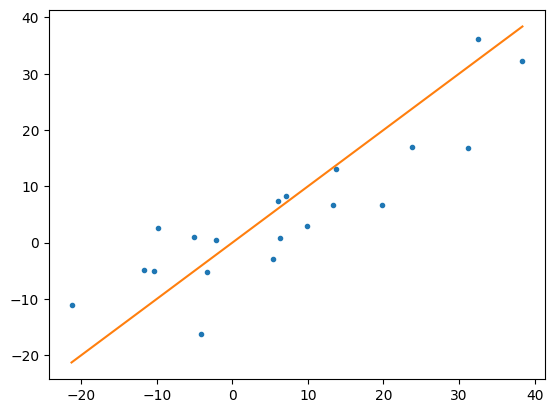

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(min(y_test), max(y_test))
y = x
plt.plot(x, y)
plt.show()

### Otros algoritmos de regresión en Scikit-Learn:
- [Support Vector Regression (SVR)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) y [Linear Support Vector Regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR)
- [Decision tree regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) 
- [Random Forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

## Regresión logística
- La regresión logística es una herramienta eficaz para la clasificación multiclase. 
- Es rápida y sencilla. 
- El hecho de que use una curva con forma de S en lugar de una línea recta la hace ideal para dividir los datos en grupos. 
- La regresión logística proporciona límites de clase lineal.

<a href="https://becominghuman.ai/machine-learning-using-logistic-regression-in-python-with-code-ab3c7f5f3bed"><img src="https://miro.medium.com/max/640/0*ENkZ5v28CDzuaoYU.webp"></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=400, centers=3, cluster_std=3, random_state=6)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# fit the model with data
logreg.fit(X_train,y_train)

In [ ]:
from sklearn import metrics

y_pred = logreg.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion matrix: \n {cm}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=logreg)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Naive Bayes
- Naïve Bayes es uno de los clasificadores más utilizados por su simplicidad y rapidez.
- Está basada en el Teorema de Bayes, tambiéń conocido como teorema de la probalibidad condicionada.
- El teorema de Bayes es de enorme relevancia puesto que vincula la probabilidad de A dado B con la probabilidad de B dado A. 

_Por ejemplo, sabiendo la probabilidad de tener un dolor de cabeza dado que se tiene gripe, se podría saber (si se tiene algún dato más), la probabilidad de tener gripe si se tiene un dolor de cabeza_

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=400, centers=3, cluster_std=3, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
y_pred = gnb.predict(X_test)

from sklearn import metrics
print(f'Confusion matrix: \n {metrics.confusion_matrix(y_test, y_pred)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=gnb)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Support Vector Machines
- Son un conjunto de algoritmos de aprendizaje supervisado relacionados con problemas de clasificación y regresión. 
- SVM busca un hiperplano que separe de forma óptima a los puntos de una clase de la de otra, que eventualmente han podido ser previamente proyectados a un espacio de dimensionalidad superior.
- En ese concepto de "separación óptima" es donde reside la característica fundamental de las SVM: este tipo de algoritmos buscan el hiperplano que tenga la máxima distancia (margen) con los puntos que estén más cerca de él mismo.
- Los modelos basados en SVMs están estrechamente relacionados con las redes neuronales. Usando una función kernel, resultan un método de entrenamiento alternativo para clasificadores polinomiales, funciones de base radial y perceptrón multicapa.

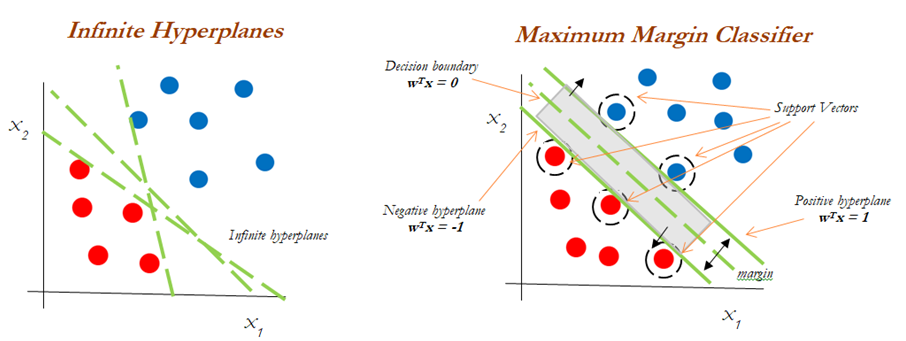

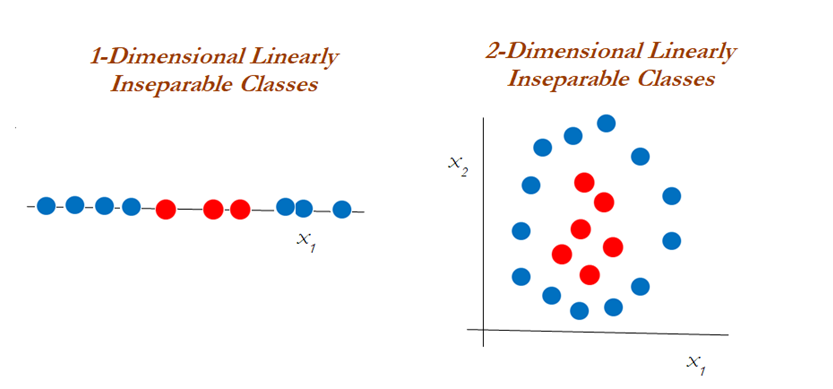

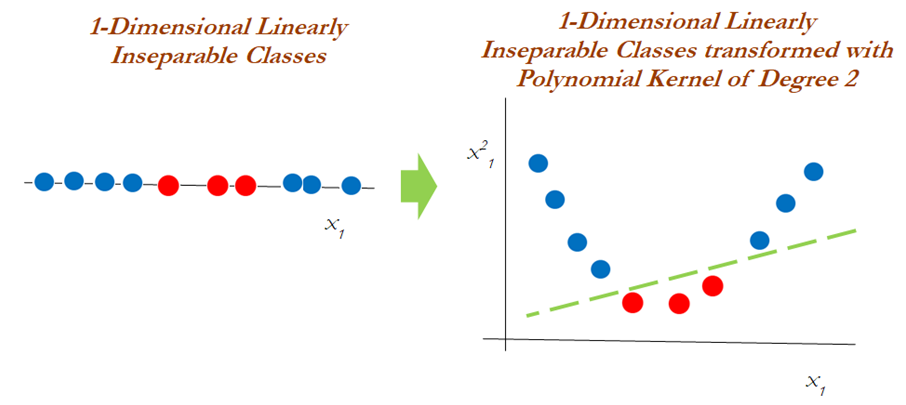

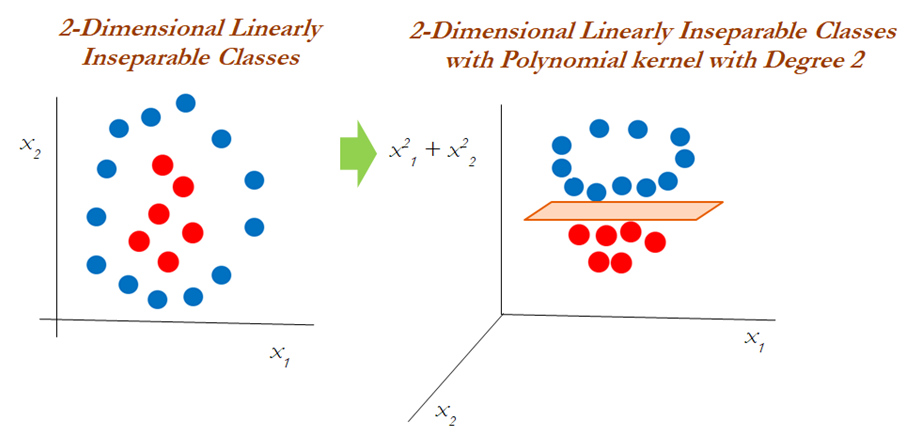

[ref](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788295758/6/ch06lvl1sec50/support-vector-machines-working-principles)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=3, cluster_std=3, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

In [ ]:
y_pred = clf.predict(X_test)

from sklearn import metrics
print(f'Confusion matrix: \n {metrics.confusion_matrix(y_test, y_pred)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=clf)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Árboles de decisión
- Los árboles de decisión dividen el espacio de características en regiones con casi siempre la misma etiqueta. 
- Estas pueden ser regiones de la misma categoría o de un valor constante, según si se está realizando una clasificación o una regresión.
- Los bosques de decisión (regresión, dos clases y multiclase), las selvas de decisión (dos clases y multiclase) y los árboles de decisión impulsados (regresión y dos clases) se basan en árboles de decisión, un concepto fundamental del aprendizaje automático. 


![Decision tree](attachment:tree.png "Decision tree")
[ref](https://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb)
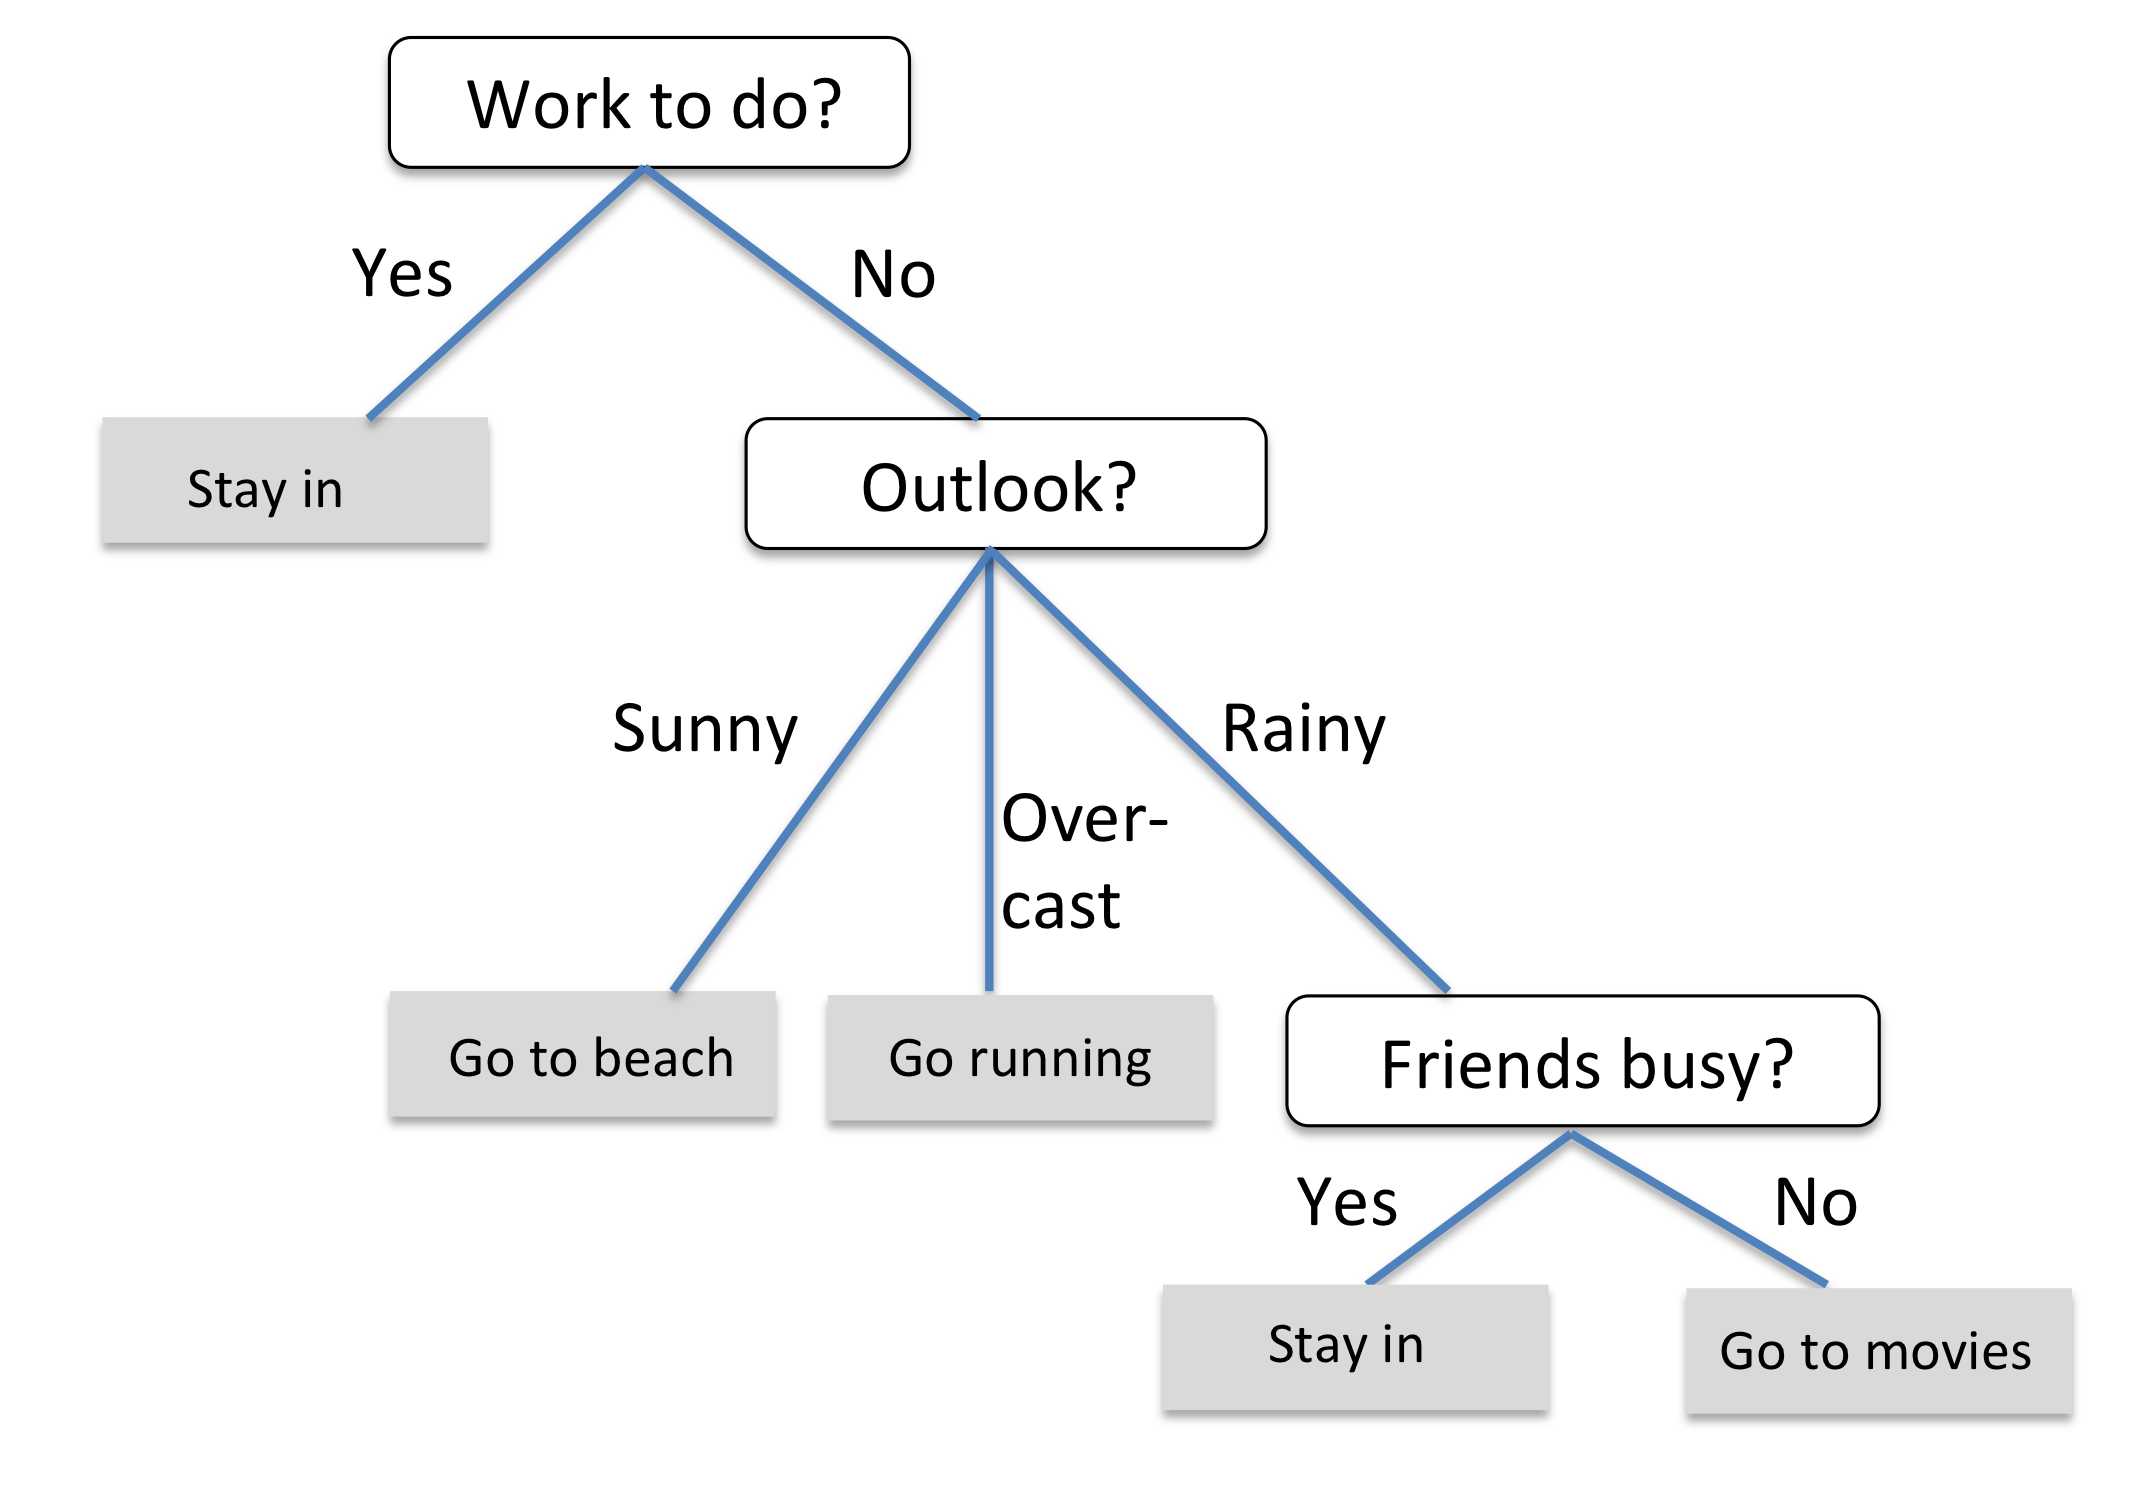

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=3, cluster_std=3, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 


In [ ]:
y_pred = decision_tree.predict(X_test)  

acc_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(f'Tree score: {acc_tree}')

y_pred = decision_tree.predict(X_test)

from sklearn import metrics
print(f'Confusion matrix: \n {metrics.confusion_matrix(y_test, y_pred)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=decision_tree)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Random forests
- Random forest es un método que combina una cantidad grande de árboles de decisión independientes probados sobre conjuntos de datos aleatorios con igual distribución.
- La fase de aprendizaje consiste en crear muchos árboles de decisión independientes, construyéndolos a partir de datos de entrada ligeramente distintos. Se altera, por tanto, el conjunto inicial de partida, haciendo lo siguiente:
  - Se selecciona aleatoriamente con reemplazamiento un porcentaje de datos de la muestra total. Es habitual incluir un segundo nivel aleatoriedad, esta vez afectando los atributos:
  - En cada nodo, al seleccionar la partición óptima, tenemos en cuenta sólo una porción de los atributos, elegidos al azar en cada ocasión.

- Una vez que tenemos muchos árboles, 1000 por ejemplo, la fase de clasificación se lleva a cabo de la siguiente forma:
  - Cada árbol se evalúa de forma independiente y la predicción del bosque será la media de los 1000 árboles. La proporción de árboles que toman una misma respuesta se interpreta como la probabilidad de la misma.
  
[ref](https://quantdare.com/random-forest-vs-simple-tree/)

**Ventajas**
- Ser uno de los algoritmos de aprendizaje más certeros que hay disponible. Para un set de datos lo suficientemente grande produce un clasificador muy certero.
- Correr eficientemente en bases de datos grandes.
- Manejar cientos de variables de entrada sin excluir ninguna.
- Dar estimaciones de qué variables son importantes en la clasificación.
- Tener un método eficaz para estimar datos perdidos y mantener la exactitud cuando una gran proporción de los datos está perdida.
- Computar los prototipos que dan información sobre la relación entre las variables y la clasificación.
- Computar las proximidades entre los pares de casos que pueden usarse en los grupos, localizando valores atípicos, o (ascendiendo) dando vistas interesantes de los datos.
- Ofrecer un método experimental para detectar las interacciones de las variables.

**Desventajas**
- Sobreajusta en ciertos grupos de datos con tareas de clasificación/regresión ruidosas.
- A diferencia de los árboles de decisión, la clasificación hecha por random forests es difícil de interpretar.
- Para los datos que incluyen variables categóricas con diferente número de niveles, el random forests se parcializa a favor de esos atributos con más niveles.
- Si los datos contienen grupos de atributos correlacionados con similar relevancia para el rendimiento, entonces los grupos más pequeños están favorecidos sobre los grupos más grandes.

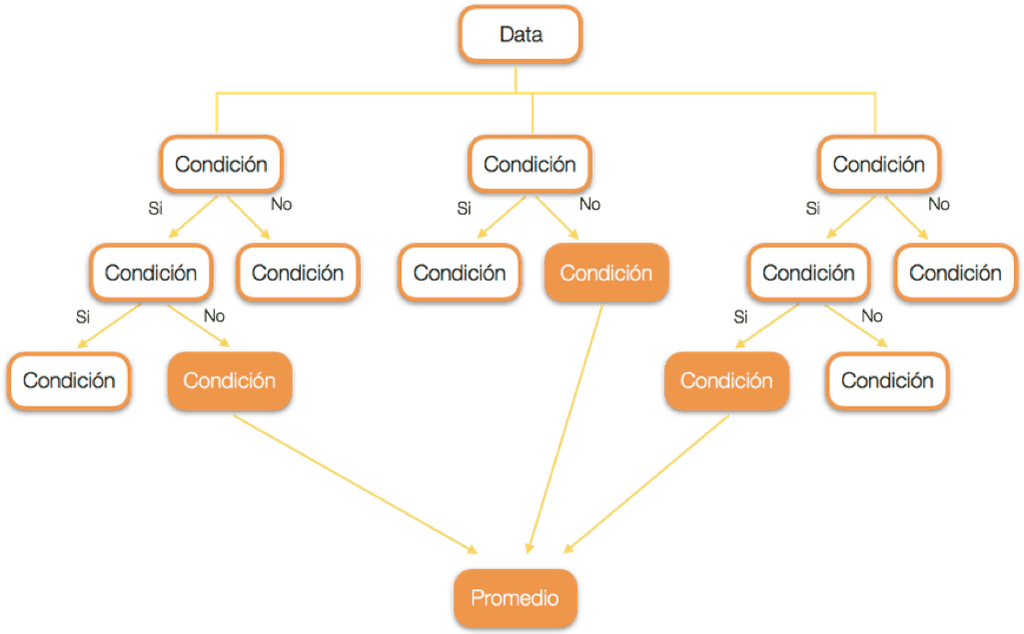
[ref](http://ligdigonzalez.com/aprendizaje-supervisado-random-forest-regression/)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=3, cluster_std=3, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

In [ ]:
y_pred = random_forest.predict(X_test)  

acc_tree = round(random_forest.score(X_train, y_train) * 100, 2)
print(f'Tree score: {acc_tree}')

y_pred = random_forest.predict(X_test)

from sklearn import metrics
print(f'Confusion matrix: \n {metrics.confusion_matrix(y_test, y_pred)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=random_forest)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Feature Importance
Una función muy útil de los random forest es que facilitan la importancia relativa de cada feature en el modelo entrenado. 

Sklearn mide la importancia de las features al observar en qué medida los nodos de los árboles que usan esa característica reducen el error en promedio (en todos los árboles del bosque). 

Se puede calcular esta puntuación para cada función después del entrenamiento y automáticamente escala los resultados para que la suma de todas las importancias sea igual a 1.

In [ ]:
import pandas as pd

print(np.round(random_forest.feature_importances_,3))

importances = pd.DataFrame({'feature':X.shape[1],
                            'importance':np.round(random_forest.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances.head())

importances.plot.bar()

## K-nearest-neighbors
- El algoritmo clasifica cada dato nuevo en el grupo que corresponda, según tenga k vecinos más cerca de un grupo o de otro. 
- Calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias.
- En contraste con otros algoritmos de aprendizaje supervisado, K-NN no genera un modelo fruto del aprendizaje con datos de entrenamiento, sino que el aprendizaje sucede en el mismo momento en el que se prueban los datos de test. A este tipo de algoritmos se les llama _lazy learning methods_

Destacar que K-NN es muy sensible a:
- La variable `k`, de modo que con valores distintos de k podemos obtener resultados también muy distintos. Este valor suele fijarse tras un proceso de pruebas con varias instancias.
- La métrica de similitud utilizada, puesto que esta influirá, fuertemente, en las relaciones de cercanía que se irán estableciendo en el proceso de construcción del algoritmo. La métrica de distancia puede llegar a contener pesos que nos ayudarán a calibrar el algoritmo de clasificación, convirtiéndola, de hecho, en una métrica personalizada.


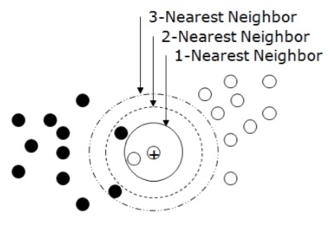

- Para `k = 1` el algoritmo clasificará la bola con signo + como blanca
- Para `k = 2` el algoritmo no tiene criterio para clasificar la bola con signo +
- Para `k >= 3` el algoritmo clasificará la bola con signo + como negra

[Ref](https://www.analiticaweb.es/algoritmo-knn-modelado-datos/)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

X, y = make_blobs(n_samples=400, centers=3, cluster_std=3, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  

In [ ]:
y_pred = knn.predict(X_test)  

from sklearn import metrics
print(f'Confusion matrix: \n {metrics.confusion_matrix(y_test, y_pred)}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=knn)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()